In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [10]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

C:\Users\HARSH\Anaconda3\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Reading Data

In [11]:
data = pd.read_csv("Combined_Data.csv")

In [5]:
data["Churn"].value_counts()

0    14446
1      506
Name: Churn, dtype: int64

In [12]:
data.head(100)

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Region,Sale of Equipment Status,Age,Equipment Warranty,...,Last_Month_used_pattern,Average_of_used_pattern_of_last_two_month,Average_of_used_pattern_of_last_three_month,Last_Month_Post_Limit,Average_of_Post_Limit_of_last_two_month,Average_of_Post_Limit_of_last_three_month,Last_MOnth_data_used,Average_of_data_used_of_last_two_month,Average_of_data_used_of_last_three_month,Churn
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,...,634.68,648.550,671.666667,0.0,0.0,0.000000,109.10,109.725,87.750000,0
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,...,495.77,574.085,614.763333,0.0,0.0,1.666667,103.50,87.200,90.933333,0
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,...,743.73,637.600,670.940000,0.0,0.0,0.000000,75.10,62.500,64.950000,0
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,...,598.20,633.650,670.176667,0.0,0.0,0.000000,56.60,56.650,57.333333,0
4,M5,2015-01-18,VALID,PRP,Open,NaN,Western,RENTED,NaN,Full Year,...,598.23,503.830,431.060000,0.0,0.0,0.000000,1.40,2.550,5.866667,0
5,M6,2013-09-05,VALID,KLA,Open,NaN,Eastern,BOUGHT,NaN,Three Full Years,...,742.72,719.370,727.563333,0.0,0.0,12.000000,44.25,55.500,134.850000,0
6,M7,2012-07-05,VALID,KLA,Open,NaN,Eastern,BOUGHT,NaN,Three Full Years,...,351.28,381.880,343.193333,0.0,0.0,0.000000,21.15,37.225,87.366667,0
7,M8,2011-12-01,VALID,PWM,Open,Female,Eastern,RENTED,49.0,Three Full Years,...,708.93,702.325,715.876667,0.0,0.0,0.000000,125.55,133.600,145.016667,0
8,M9,2011-10-13,VALID,PWR,Open,Female,Eastern,RENTED,63.0,Three Full Years,...,709.23,700.455,714.013333,0.0,0.0,0.000000,83.30,86.875,77.133333,0
9,M10,2011-11-17,VALID,PWM,Open,Male,Western,RENTED,79.0,Three Full Years,...,608.60,600.400,604.800000,0.0,0.0,0.000000,30.75,30.950,33.950000,0


> Function to impute missing value according to region.

In [7]:
# def impute_accord_region(Y):
#     x=data.groupby("Region ",as_index=False)[Y].median()

#     def func(X):
#         return int(x[x["Region "]==X["Region "]][Y])

#     data.loc[data[Y].isnull(),Y]=data.apply(func,axis=1)
    
def impute_accord_scheme(Y):
    x=data.groupby("Scheme",as_index=False)[Y].median()

    def func(X):
        return int(x[x["Scheme"]==X["Scheme"]][Y])

    data.loc[data[Y].isnull(),Y]=data.apply(func,axis=1)

> 

.

Filling 0 in Call-Center Nan

In [8]:
data[["Payment_Settlement","Account","Utilities","Initial_Level_Payment_Settlement","Initial_Level_Tech","Operational_Capabilities"]] = \
data[["Payment_Settlement","Account","Utilities","Initial_Level_Payment_Settlement","Initial_Level_Tech","Operational_Capabilities"]].fillna(0)

.

Filling Nan of Pattern Use with the mean of other month Pattern use.

In [9]:
# data["X"]=data[["Used pattern_Month_3","Used pattern_Month_2","Used pattern_Month_1"]].sum(axis=1)
# data["Y"]=data[["Used pattern_Month_3","Used pattern_Month_2","Used pattern_Month_1"]].count(axis=1)
# data["Z"]=data["X"]/data["Y"]

# data["Used pattern_Month_1"]=data["Used pattern_Month_1"].fillna(data["Z"])
# data["Used pattern_Month_2"]=data["Used pattern_Month_2"].fillna(data["Z"])
# data["Used pattern_Month_3"]=data["Used pattern_Month_3"].fillna(data["Z"])

# data["X"]=data[["Usage Post Limit_Month_3","Usage Post Limit_Month_2","Usage Post Limit_Month_1"]].sum(axis=1)
# data["Y"]=data[["Usage Post Limit_Month_3","Usage Post Limit_Month_2","Usage Post Limit_Month_1"]].count(axis=1)
# data["Z"]=data["X"]/data["Y"]

# data["Usage Post Limit_Month_1"]=data["Usage Post Limit_Month_1"].fillna(data["Z"])
# data["Usage Post Limit_Month_2"]=data["Usage Post Limit_Month_2"].fillna(data["Z"])
# data["Usage Post Limit_Month_3"]=data["Usage Post Limit_Month_3"].fillna(data["Z"])

# data["X"]=data[["data used_Month_3","data used_Month_2","data used_Month_1"]].sum(axis=1)
# data["Y"]=data[["data used_Month_3","data used_Month_2","data used_Month_1"]].count(axis=1)
# data["Z"]=data["X"]/data["Y"]

# data["data used_Month_1"]=data["data used_Month_1"].fillna(data["Z"])
# data["data used_Month_2"]=data["data used_Month_2"].fillna(data["Z"])
# data["data used_Month_3"]=data["data used_Month_3"].fillna(data["Z"])

# del data["X"], data["Y"], data["Z"]

.

> Removing rows in which almost all features are unknown.

In [10]:
data.shape

(14952, 39)

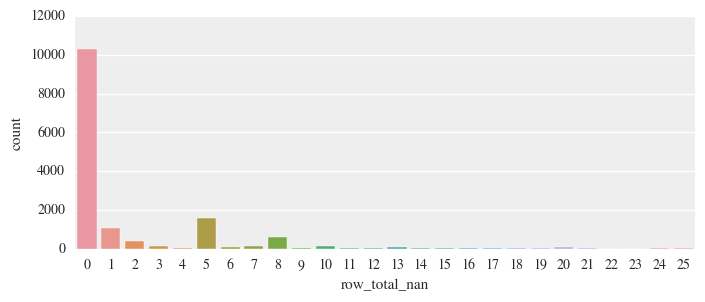

In [11]:
data["row_total_nan"]=data.isnull().sum(axis=1)

sns.countplot(data["row_total_nan"])

In [12]:
# data["X"]=data["Account Number"].apply(lambda x: x[0])
# data.shape

In [13]:
#

In [14]:
pd.crosstab(data["row_total_nan"], data["Churn"])

Churn,0,1
row_total_nan,,
0,10100,215
1,1039,39
2,365,49
3,99,58
4,12,8
5,1539,39
6,78,7
7,101,12
8,561,22


In [15]:
#

In [16]:
# data["row_total_nan"][(data["row_total_nan"]>8) & (data["X"]=="M")].count()

In [17]:
data.shape

(14952, 40)

In [18]:
# data = data[ (data.X=="V") | ((data.X=="M") & (data.row_total_nan <=8))]
# del data["X"]
del data["row_total_nan"]

In [19]:
data.shape

(14952, 39)

.

> Removing the commence nan rows as it is too less in number.

In [20]:
# data=data[data["Commence Date"].notnull()]

In [21]:
data.shape

(14952, 39)

.

Creating one more label to deal with Nan values Gender.

In [22]:
data.loc[data.Gender.isnull(),"Gender"]="MF"

.

Imputing Nan values of features with median value(according to scheme).

In [23]:
# Age
impute_accord_scheme("Age")

In [24]:
# Salary Slab
impute_accord_scheme("Salary Slab")

In [25]:
# Age of Home
impute_accord_scheme("Age of Home")

In [26]:
# Last_Month_Payment
impute_accord_scheme("Last_Month_Payment")

In [27]:
# Average_of_payment_of_last_two_month
impute_accord_scheme("Average_of_payment_of_last_two_month")

In [28]:
# Average_of_payment_of_last_three_month
impute_accord_scheme("Average_of_payment_of_last_three_month")

In [29]:
# Last_Month_Default
impute_accord_scheme("Last_Month_Default")

In [30]:
# Average_of_default_of_last_two_month
impute_accord_scheme("Average_of_default_of_last_two_month")

In [31]:
# Average_of_default_of_last_three_month
impute_accord_scheme("Average_of_default_of_last_three_month")

In [32]:
# Defaults
impute_accord_scheme("Defaults")

In [33]:
#
impute_accord_scheme("Limit_Defaults")

In [34]:
#
impute_accord_scheme("Last_Month_used_pattern")

In [35]:
#
impute_accord_scheme("Average_of_used_pattern_of_last_two_month")

In [36]:
#
impute_accord_scheme("Average_of_used_pattern_of_last_three_month")

In [37]:
#
impute_accord_scheme("Last_Month_Post_Limit")

In [38]:
#
impute_accord_scheme("Average_of_Post_Limit_of_last_two_month")

In [39]:
#
impute_accord_scheme("Average_of_Post_Limit_of_last_three_month")

In [40]:
#
impute_accord_scheme("Last_MOnth_data_used")

In [41]:
#
impute_accord_scheme("Average_of_data_used_of_last_three_month")

In [42]:
#
impute_accord_scheme("Average_of_data_used_of_last_two_month")

In [43]:
data.columns

Index(['Account Number', 'Commence Date', 'Address', 'Scheme', 'Staus',
       'Gender', 'Region ', ' Sale of Equipment Status', 'Age',
       'Equipment Warranty', 'Salary Slab', 'Professional Info', 'Age of Home',
       'Equipment Warranty Expiry Date', 'Mode', 'Defaults',
       'Last_Month_Payment', 'Average_of_payment_of_last_two_month',
       'Average_of_payment_of_last_three_month', 'Last_Month_Default',
       'Average_of_default_of_last_two_month',
       'Average_of_default_of_last_three_month', 'Initial_Level_Tech',
       'Account', 'Payment_Settlement', 'Utilities',
       'Operational_Capabilities', 'Initial_Level_Payment_Settlement',
       'Limit_Defaults', 'Last_Month_used_pattern',
       'Average_of_used_pattern_of_last_two_month',
       'Average_of_used_pattern_of_last_three_month', 'Last_Month_Post_Limit',
       'Average_of_Post_Limit_of_last_two_month',
       'Average_of_Post_Limit_of_last_three_month', 'Last_MOnth_data_used',
       'Average_of_data_used_of_

.

Imputing Nan values of Professional info with missing(its own label).

In [44]:
data.loc[data["Professional Info"].isnull(),"Professional Info"]=0

.

Imputing Null values of Equipment Warranty and Address with Mode.

In [45]:
data.loc[data.Address.isnull(),"Address"]="VALID"
data.loc[data["Equipment Warranty"].isnull(), "Equipment Warranty"]="Three Full Years"

.

Imputing null values in Mode with mode.

In [46]:
data["Mode"][data["Mode"]=="Other"]=" Card II TYPE"
data["Mode"][data["Mode"].isnull()]=" Card II TYPE"

C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


.

In [47]:
#

> Feature Engineering of Demographic 

In [48]:
data["Current_date"]="2015-03-31"

In [49]:
data["Current_date"] = pd.to_datetime(data["Current_date"])
data["Commence Date"] = pd.to_datetime(data["Commence Date"])
data["Equipment Warranty Expiry Date"] = pd.to_datetime(data["Equipment Warranty Expiry Date"])

In [50]:
data["Time_period"]  = data["Current_date"] - data["Commence Date"]
data["Contract_Time_Remaining"] = data["Equipment Warranty Expiry Date"] - data["Current_date"]

In [51]:
del data["Current_date"], data["Commence Date"], data["Equipment Warranty Expiry Date"]

In [ ]:
data["Time_period"]= (data["Time_period"].dropna()/ np.timedelta64(1, 'D')).astype(int)
data["Contract_Time_Remaining"]= (data["Contract_Time_Remaining"].dropna()/ np.timedelta64(1, 'D')).astype(int)

> 

> Filling Nan of Time_period and Contract time expiry.

In [ ]:
# Time_period
impute_accord_scheme("Time_period")

In [ ]:
# Contract_Time_Remaining
impute_accord_scheme("Contract_Time_Remaining")

> 

In [ ]:
#

In [ ]:
data.iloc[176]

In [ ]:
data.to_csv("Dealing_Data.csv",index=False)

.

In [ ]:
data.shape

In [ ]:
#no